# Графы знаний. Трансляционные модели

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Курс "Машинное обучение на графах", Лекция "Графы знаний"
* Документация:
    * https://pykeen.readthedocs.io/en/stable/tutorial/first_steps.html
    * https://pykeen.readthedocs.io/en/stable/reference/datasets.html
    * https://pykeen.readthedocs.io/en/stable/reference/predict.html#get-prediction-df

## Вопросы для совместного обсуждения

1\. Обсудите общий подход к построению эмбеддингов графов знаний при помощи трансляционных моделей и способы настройки таких моделей при помощи пакета `pykeen`.

In [ ]:
#!pip install pykeen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.3/730.3 kB 9.1 MB/s eta 0:00:00


In [2]:
from pykeen.datasets import Nations

In [3]:
dataset = Nations()

In [4]:
dataset.training.triples[:5]

Reconstructing all label-based triples. This is expensive and rarely needed.


array([['brazil', 'blockpositionindex', 'china'],
       ['brazil', 'blockpositionindex', 'cuba'],
       ['brazil', 'blockpositionindex', 'poland'],
       ['brazil', 'blockpositionindex', 'ussr'],
       ['brazil', 'booktranslations', 'uk']], dtype='<U19')

In [5]:
dataset.training.mapped_triples[:5]

tensor([[ 0,  3,  2],
        [ 0,  3,  3],
        [ 0,  3, 10],
        [ 0,  3, 13],
        [ 0,  4, 11]])

In [6]:
from pykeen.pipeline import pipeline

In [7]:
pipe_transe = pipeline(
    dataset="Nations",
    model="TransE",
    training_kwargs={
        "num_epochs": 2
    }
)

No random seed is specified. Setting to 238133733.


Training epochs on cuda:0:   0%|          | 0/2 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Evaluating on cuda:0:   0%|          | 0.00/201 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds


In [8]:
metrics = pipe_transe.metric_results.to_df()
metrics

,Side,Rank_type,Metric,Value
0,head,optimistic,variance,8.243162
1,tail,optimistic,variance,7.421895
2,both,optimistic,variance,7.841464
3,head,realistic,variance,8.243161
4,tail,realistic,variance,7.421896
...,...,...,...,...
220,tail,realistic,adjusted_hits_at_k,0.162096
221,both,realistic,adjusted_hits_at_k,0.015663
222,head,pessimistic,adjusted_hits_at_k,-0.132816
223,tail,pessimistic,adjusted_hits_at_k,0.162096


In [9]:
metrics["Metric"].unique()

array(['variance', 'adjusted_arithmetic_mean_rank_index',
       'geometric_mean_rank', 'arithmetic_mean_rank',
       'standard_deviation', 'adjusted_arithmetic_mean_rank',
       'inverse_arithmetic_mean_rank', 'inverse_harmonic_mean_rank',
       'inverse_median_rank', 'z_arithmetic_mean_rank',
       'harmonic_mean_rank', 'median_rank', 'z_geometric_mean_rank',
       'z_inverse_harmonic_mean_rank', 'count',
       'inverse_geometric_mean_rank',
       'adjusted_inverse_harmonic_mean_rank', 'median_absolute_deviation',
       'adjusted_geometric_mean_rank_index', 'hits_at_1', 'hits_at_3',
       'hits_at_5', 'hits_at_10', 'z_hits_at_k', 'adjusted_hits_at_k'],
      dtype=object)

## Задачи для самостоятельного решения

In [34]:
from pykeen.datasets import CoDExSmall
from pykeen.pipeline import pipeline
import matplotlib.pyplot as plt
import numpy as np
import torch as th
import pandas as pd

<p class="task" id="1"></p>

1\. Загрузите датасет `CoDExSmall`. Выведите на экран (обратитесь к соответстующим полям) количество сущностей в обучающем (`<dataset>.training`), валидационном (`<dataset>.validation`) и тестовом (`<dataset>.testing`) множестве.

Выведите на экран одну произвольную тройку $(h, r, t)$ в оригинальном виде (`<dataset>.triples`) и эту же тройку, но с использованием числового представления сущностей/отношений (`<dataset>.mapped_triples`).

- [ ] Проверено на семинаре

In [2]:
dataset = CoDExSmall()

def count_entities(triples):
    entities = set(triples[:, 0]) | set(triples[:, 2])
    return len(entities)

count_entities(dataset.training.mapped_triples.numpy()), count_entities(dataset.validation.mapped_triples.numpy()), count_entities(dataset.testing.mapped_triples.numpy())

(2034, 1390, 1390)

In [3]:
dataset.training.triples[0], dataset.training.mapped_triples[0]

Reconstructing all label-based triples. This is expensive and rarely needed.


(array(['Q1000', 'P30', 'Q15'], dtype='<U9'), tensor([  1,  23, 263]))

<p class="task" id="2"></p>

2\. Обучите модель TransE на датасете `CoDExSmall` при помощи `pipeline`. Задайте количество эпох обучения (`num_epochs` в `training_kwargs`), равное 100, и размерность эмбеддингов (`embedding_dim` в ` model_kwargs`), равную 64.

Изобразите график значений функции потерь в зависимости от номера эпохи (`<pipeline_result>.plot_losses`).

Выведите на экран значение метрик в виде `pd.DataFrame` (`<pipeline_result>.metric_results.to_df()`)

- [ ] Проверено на семинаре

No random seed is specified. Setting to 315235873.


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Evaluating on cuda:0:   0%|          | 0.00/1.83k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds


,Side,Rank_type,Metric,Value
0,head,optimistic,median_absolute_deviation,81.543122
1,tail,optimistic,median_absolute_deviation,7.413011
2,both,optimistic,median_absolute_deviation,22.239033
3,head,realistic,median_absolute_deviation,81.543122
4,tail,realistic,median_absolute_deviation,7.413011
...,...,...,...,...
220,tail,realistic,adjusted_hits_at_k,0.614610
221,both,realistic,adjusted_hits_at_k,0.415993
222,head,pessimistic,adjusted_hits_at_k,0.217273
223,tail,pessimistic,adjusted_hits_at_k,0.614610


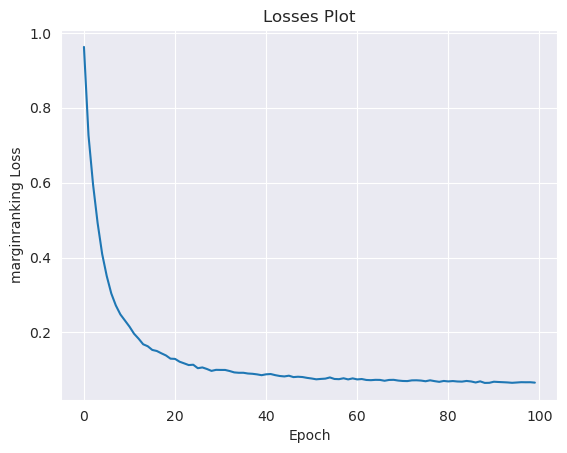

In [ ]:
result = pipeline(
    model='TransE',
    dataset='codexsmall',
    model_kwargs=dict(embedding_dim=64),
    training_kwargs=dict(num_epochs=100),
)

result.plot_losses()

metrics_df = result.metric_results.to_df()
metrics_df

<p class="task" id="3"></p>

3\. Выберите случайным образом одну тройку $(h, r, t^*)$ из тестового множества. Используя обученную модель, рассчитайте оценки для всех троек $(h, r, t), t \in K$.

Найдите позицию (ранг) истинного значения объекта тройки $t^*$ в списке прогнозов, отсортированном в порядке убывания величины `score`.

- [ ] Проверено на семинаре

In [32]:
test_triples = dataset.testing.mapped_triples
n_entities = result.model.num_entities

random_idx = np.random.randint(len(test_triples))
h, r, t_true = test_triples[random_idx]
h, r, t_true

(tensor(728), tensor(7), tensor(435))

In [33]:
t_true = int(t_true)

h_batch = th.full((n_entities,), h, dtype=th.long)
r_batch = th.full((n_entities,), r, dtype=th.long)
t_batch = th.arange(n_entities, dtype=th.long)
candidates = th.stack([h_batch, r_batch, t_batch], dim=1) 

model = result.model.to('cpu')
model.eval()
with th.no_grad():
    scores = model.score_hrt(candidates)         
    scores = scores.squeeze(dim=-1).cpu().numpy()

sorted_idx = list(np.argsort(-scores)) 
rank = sorted_idx.index(t_true) + 1

rank, n_entities

(3, 2034)

<p class="task" id="4"></p>

4\. Обучите модели TransE, TransH и TransD на датасете `CoDExSmall`.

Сравните качество полученных моделей по следующим метрикам (side=both и type=realistic):
* Adjusted Arithmetic Mean Rank (AAMR): `adjusted_arithmetic_mean_rank`
* Mean Reciprocal Rank (MRR): `inverse_harmonic_mean_rank`
* Hits @ 10: `hits_at_10`

Визуализируйте результаты в виде столбчатой диаграммы

- [ ] Проверено на семинаре

In [35]:
models = ['TransE', 'TransH', 'TransD']
results = {
    m: pipeline(
        model=m,
        dataset='codexsmall',
        model_kwargs=dict(embedding_dim=64),
        training_kwargs=dict(num_epochs=100),
    )
    for m in models
}

INFO:pykeen.datasets.utils:Loading cached preprocessed dataset from file:///home/danya/.data/pykeen/datasets/codexsmall/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Loading from file:///home/danya/.data/pykeen/datasets/codexsmall/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Loading from file:///home/danya/.data/pykeen/datasets/codexsmall/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/testing
INFO:pykeen.triples.triples_factory:Loading from file:///home/danya/.data/pykeen/datasets/codexsmall/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/validation
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Evaluating on cuda:0:   0%|          | 0.00/1.83k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
INFO:pykeen.datasets.utils:Loading cached preprocessed dataset from file:///home/danya/.data/pykeen/datasets/codexsmall/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Loading from file:///home/danya/.data/pykeen/datasets/codexsmall/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Loading from file:///home/danya/.data/pykeen/datasets/codexsmall/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/testing
INFO:pykeen.triples.triples_factory:Loading from file:///home/danya/.data/pykeen/datasets/codexsmall/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/validation
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Evaluating on cuda:0:   0%|          | 0.00/1.83k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.datasets.utils:Loading cached preprocessed dataset from file:///home/danya/.data/pykeen/datasets/codexsmall/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Loading from file:///home/danya/.data/pykeen/datasets/codexsmall/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Loading from file:///home/danya/.data/pykeen/datasets/codexsmall/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/testing
INFO:pykeen.triples.triples_factory:Loading from file:///home/danya/.data/pykeen/datasets/codexsmall/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/validation
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/129 [00:00<?, ?batch/s]

Evaluating on cuda:0:   0%|          | 0.00/1.83k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds


In [ ]:
metrics_keys = [
    'adjusted_arithmetic_mean_rank', 
    'inverse_harmonic_mean_rank',     
    'hits_at_10',                    
]
rows = []
for m in models:
    dfm = results[m].metric_results.to_df()
    sel = dfm[(dfm['Side'] == 'both') & (dfm['Rank_type'] == 'realistic')]
    rows.append([sel.loc[sel['Metric'] == key, 'Value'].values[0] for key in metrics_keys])

df = pd.DataFrame(rows, index=models, columns=['AAMR', 'MRR', 'Hits@10'])
df

,AAMR,MRR,Hits@10
TransE,0.103402,0.195217,0.430525
TransH,0.121933,0.140926,0.317287
TransD,0.062174,0.227922,0.495624


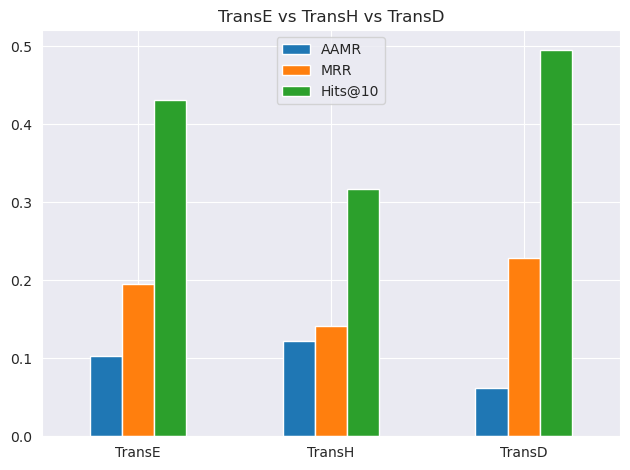

In [ ]:
ax = df.plot.bar(rot=0)
ax.set_title('TransE vs TransH vs TransD')
plt.tight_layout()
plt.show()